<a href="https://colab.research.google.com/github/Anurag-Mohan/Amazon-Inventory-Analysis/blob/main/EvasiveEncryptedMalwareDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 7.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/EncryptedMalware/ALLFLOWMETER_HIKARI2021.csv'
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(555278, 88)


,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'uid', 'originh', 'originp', 'responh',
       'responp', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max'

In [ ]:
import numpy as np, pandas as pd


df.info()
df.isna().sum().sum()
df.nunique().sort_values()[:20]
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,555278.0,277638.500000,1.602951e+05,0.0,138819.250000,277638.500000,416457.750000,5.552770e+05
Unnamed: 0,555278.0,137369.392132,9.994680e+04,0.0,52201.000000,121610.500000,211889.750000,3.507090e+05
originp,555278.0,38673.198034,1.807183e+04,21.0,28581.000000,42693.500000,53120.000000,6.553500e+04
responp,555278.0,5082.161647,1.291581e+04,0.0,53.000000,443.000000,443.000000,6.552200e+04
flow_duration,555278.0,9.306544,1.018027e+02,0.0,0.000311,0.026218,0.347231,1.739303e+04
...,...,...,...,...,...,...,...,...
idle.std,555278.0,799257.630067,7.206576e+06,0.0,0.000000,0.000000,0.000000,2.029962e+08
fwd_init_window_size,555278.0,14750.725718,1.500349e+04,0.0,0.000000,5840.000000,29200.000000,6.553500e+04
bwd_init_window_size,555278.0,21005.879513,2.915541e+04,0.0,0.000000,0.000000,65160.000000,6.553500e+04
fwd_last_window_size,555278.0,4546.872210,1.106946e+04,0.0,0.000000,0.000000,402.000000,6.553500e+04


In [ ]:
df['Label'].value_counts(dropna=False)
df['traffic_category'].value_counts(dropna=False)
df.groupby('traffic_category')['Label'].value_counts()

,,count
traffic_category,Label,
Background,0,170151
Benign,0,347431
Bruteforce,1,5884
Bruteforce-XML,1,5145
Probing,1,23388
XMRIGCC CryptoMiner,1,3279


In [ ]:
pos = (df['Label']==1).sum()
neg = (df['Label']==0).sum()
pos_ratio = pos / (pos+neg)
print({'malware_count': pos, 'benign_count': neg, 'malware_ratio': pos_ratio})

{'malware_count': np.int64(37696), 'benign_count': np.int64(517582), 'malware_ratio': np.float64(0.06788671620341523)}


In [ ]:
dup_rows = df.duplicated().sum()
print('duplicate_rows:', dup_rows)

duplicate_rows: 0


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
stds = df[numeric_cols].std()
constant = stds[stds==0].index.tolist()
print('constant_features:', constant)

constant_features: []


In [ ]:
corr = df[numeric_cols].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = [(c1,c2,upper.loc[c1,c2]) for c1 in upper.columns for c2 in upper.columns if c1!=c2 and not np.isnan(upper.loc[c1,c2]) and upper.loc[c1,c2]>0.9]
len(high_corr_pairs), high_corr_pairs[:10]

(71,
 [('flow_duration', 'fwd_iat.tot', np.float64(0.999633015088786)),
  ('flow_duration', 'flow_iat.tot', np.float64(0.9999995534639948)),
  ('flow_duration', 'idle.tot', np.float64(0.9601990762575894)),
  ('fwd_pkts_tot', 'bwd_pkts_tot', np.float64(0.9978189650041458)),
  ('fwd_pkts_tot', 'bwd_data_pkts_tot', np.float64(0.9983212222994149)),
  ('fwd_pkts_tot', 'fwd_header_size_tot', np.float64(0.9983151082233829)),
  ('fwd_pkts_tot', 'bwd_header_size_tot', np.float64(0.9969710939451168)),
  ('fwd_pkts_tot', 'flow_ACK_flag_count', np.float64(0.9994401010522114)),
  ('bwd_pkts_tot', 'bwd_data_pkts_tot', np.float64(0.9994628974729124)),
  ('bwd_pkts_tot', 'fwd_header_size_tot', np.float64(0.9956374626142397))])

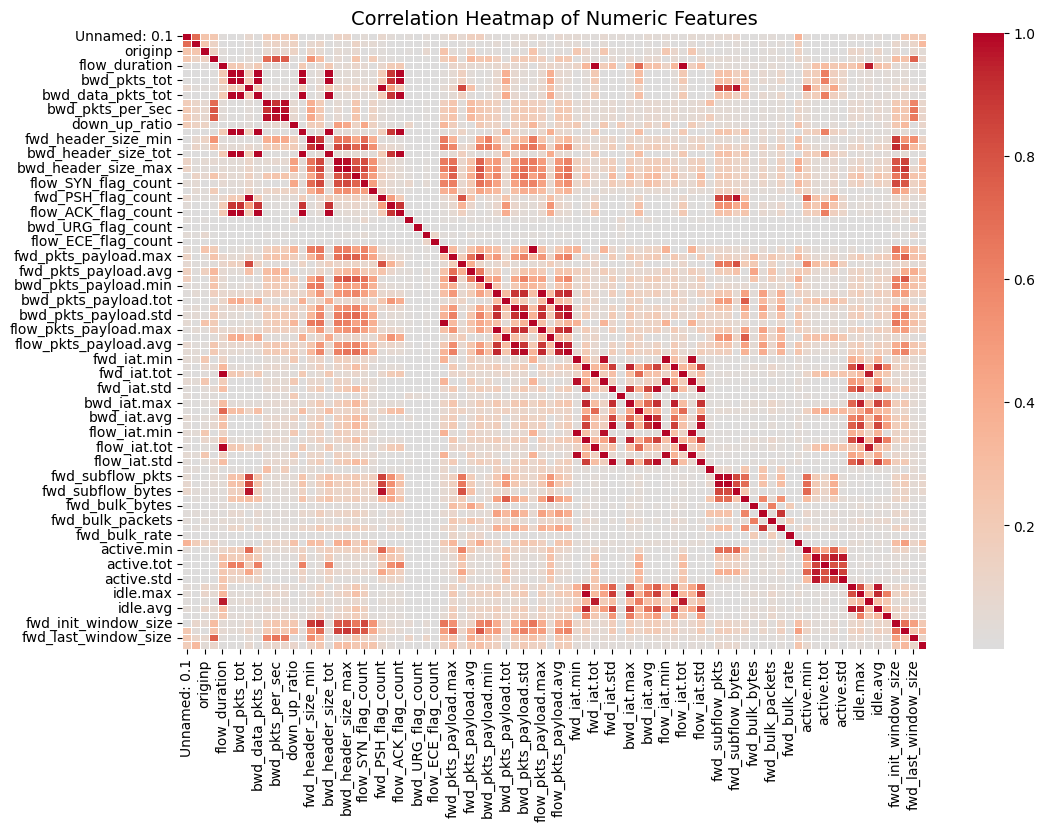

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

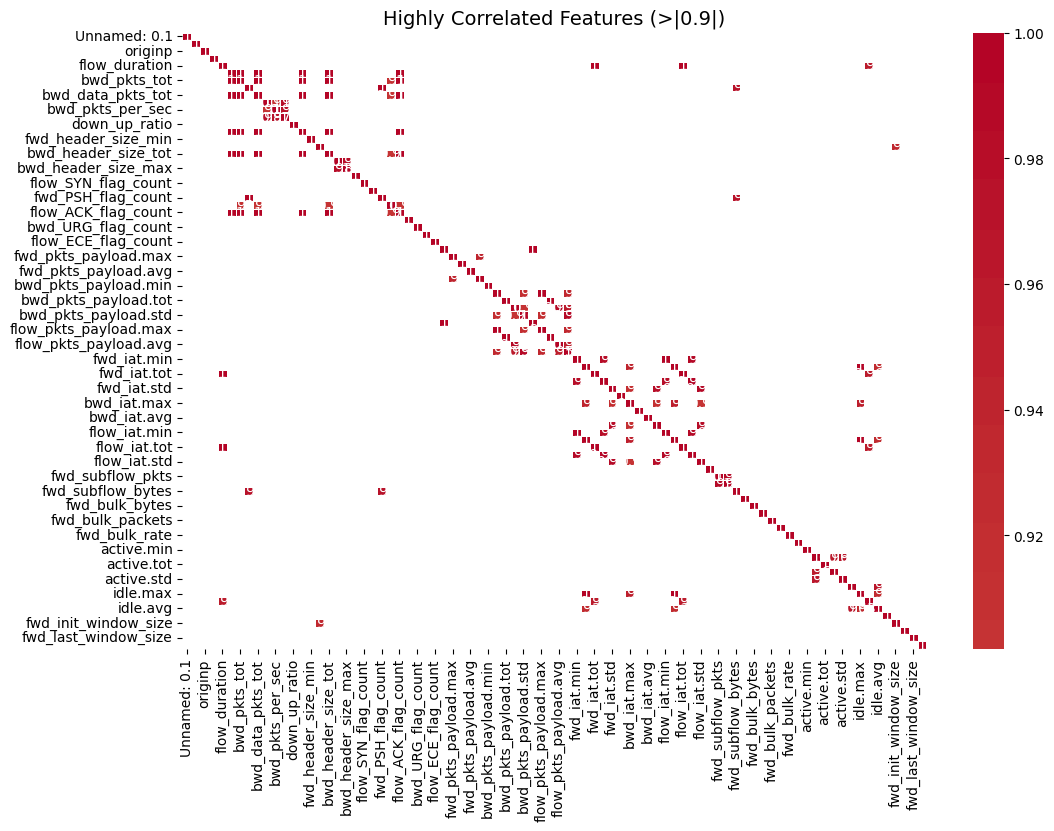

In [ ]:
mask = (corr.abs() < 0.9)  # mask values < 0.9
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Highly Correlated Features (>|0.9|)", fontsize=14)
plt.show()

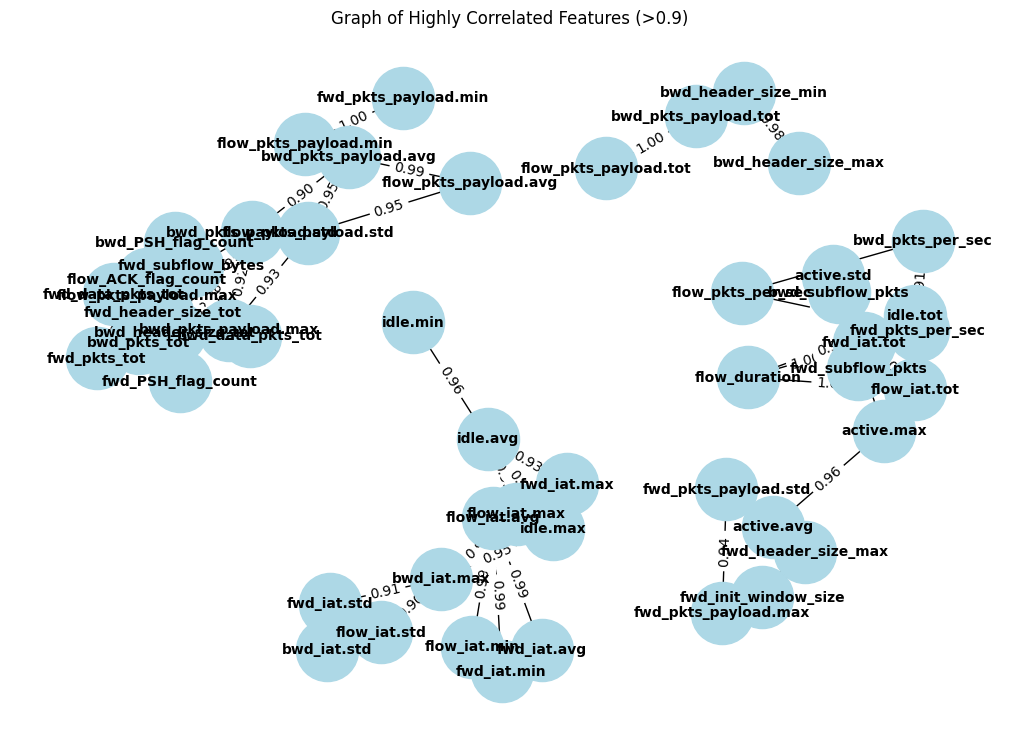

In [ ]:
import networkx as nx

G = nx.Graph()
for c1, c2, val in high_corr_pairs:
    G.add_edge(c1, c2, weight=val)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v): f"{d['weight']:.2f}" for u,v,d in G.edges(data=True)})
plt.title("Graph of Highly Correlated Features (>0.9)")
plt.show()


In [ ]:
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(inplace=True)
print(df.shape)

(555278, 88)


In [ ]:
print(df.shape)
print(df['Label'].value_counts())
print(df['traffic_category'].value_counts())

(555278, 88)
Label
0    517582
1     37696
Name: count, dtype: int64
traffic_category
Benign                 347431
Background             170151
Probing                 23388
Bruteforce               5884
Bruteforce-XML           5145
XMRIGCC CryptoMiner      3279
Name: count, dtype: int64


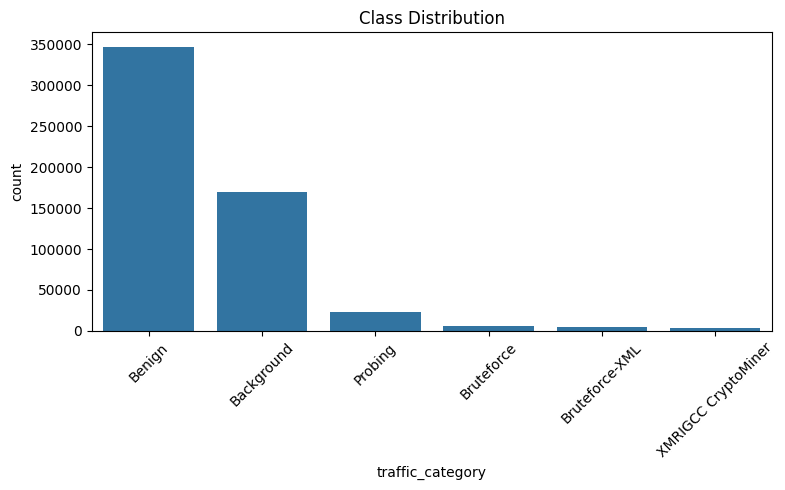

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="traffic_category", order=df["traffic_category"].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
outliers = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

Unnamed: 0.1: 0 outliers
Unnamed: 0: 0 outliers
originp: 0 outliers
responp: 116890 outliers
flow_duration: 123666 outliers
fwd_pkts_tot: 35721 outliers
bwd_pkts_tot: 30287 outliers
fwd_data_pkts_tot: 43689 outliers
bwd_data_pkts_tot: 36750 outliers
fwd_pkts_per_sec: 83352 outliers
bwd_pkts_per_sec: 82645 outliers
flow_pkts_per_sec: 83245 outliers
down_up_ratio: 185111 outliers
fwd_header_size_tot: 33972 outliers
fwd_header_size_min: 0 outliers
fwd_header_size_max: 0 outliers
bwd_header_size_tot: 29272 outliers
bwd_header_size_min: 0 outliers
bwd_header_size_max: 0 outliers
flow_FIN_flag_count: 2110 outliers
flow_SYN_flag_count: 2243 outliers
flow_RST_flag_count: 14442 outliers
fwd_PSH_flag_count: 34383 outliers
bwd_PSH_flag_count: 29382 outliers
flow_ACK_flag_count: 32783 outliers
fwd_URG_flag_count: 785 outliers
bwd_URG_flag_count: 6 outliers
flow_CWR_flag_count: 1073 outliers
flow_ECE_flag_count: 19 outliers
fwd_pkts_payload.min: 20464 outliers
fwd_pkts_payload.max: 3335 outliers
fw

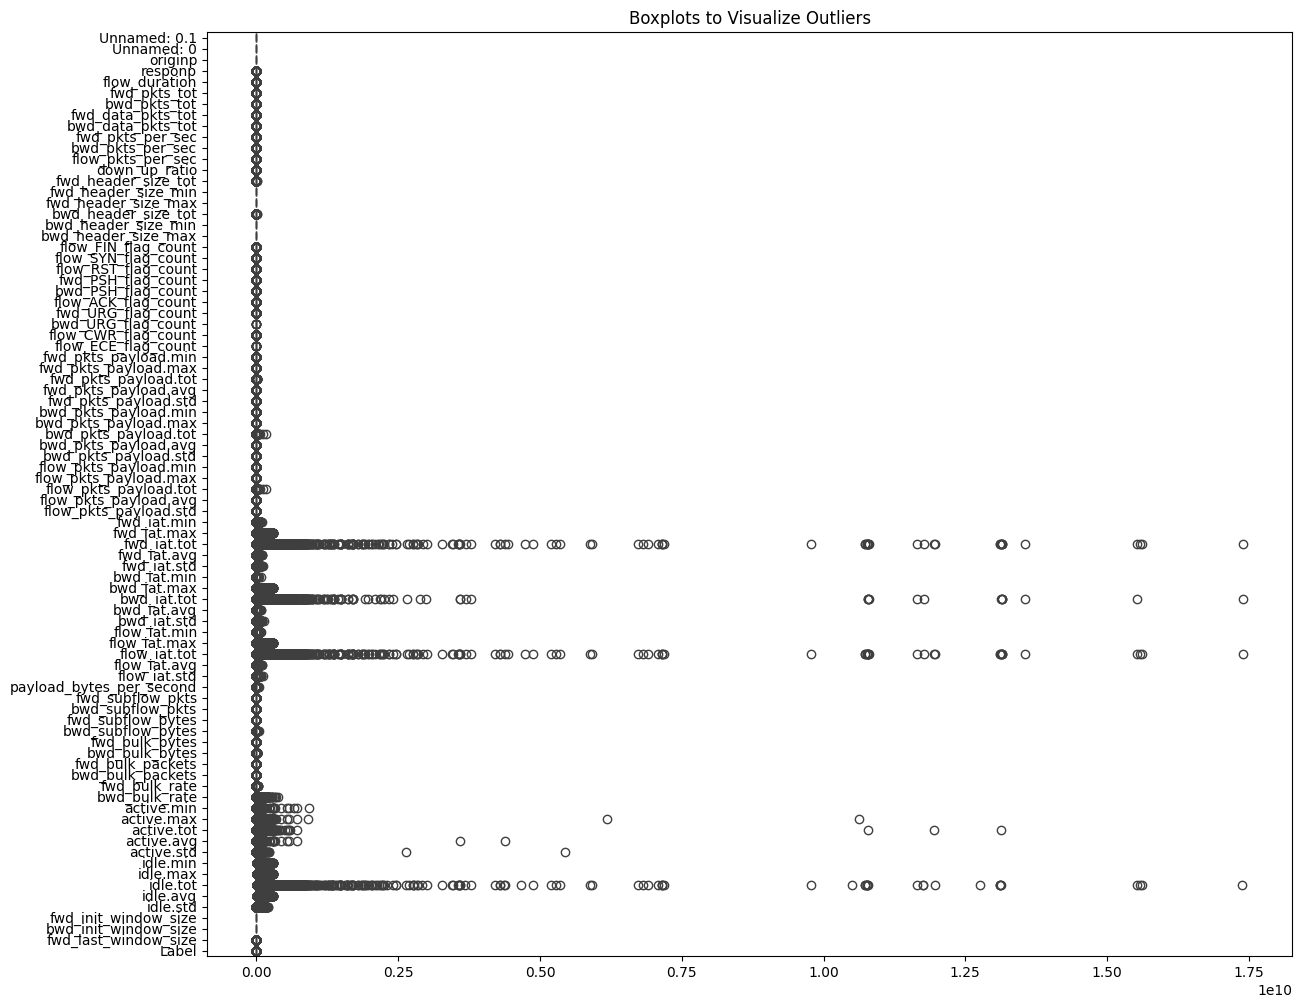

In [ ]:
plt.figure(figsize=(14,12))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), orient="h")
plt.title("Boxplots to Visualize Outliers")
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    col_skew = skew(df[col].dropna())
    col_kurt = kurtosis(df[col].dropna())
    print(f"{col}: Skewness={col_skew:.2f}, Kurtosis={col_kurt:.2f}")


Unnamed: 0.1: Skewness=-0.00, Kurtosis=-1.20
Unnamed: 0: Skewness=0.48, Kurtosis=-0.88
originp: Skewness=-0.70, Kurtosis=-0.61
responp: Skewness=2.50, Kurtosis=4.39
flow_duration: Skewness=96.90, Kurtosis=12006.91
fwd_pkts_tot: Skewness=631.02, Kurtosis=441101.58
bwd_pkts_tot: Skewness=614.89, Kurtosis=424923.41
fwd_data_pkts_tot: Skewness=16.97, Kurtosis=317.48
bwd_data_pkts_tot: Skewness=621.60, Kurtosis=431231.06
fwd_pkts_per_sec: Skewness=6.73, Kurtosis=126.89
bwd_pkts_per_sec: Skewness=3.35, Kurtosis=14.57
flow_pkts_per_sec: Skewness=3.72, Kurtosis=21.98
down_up_ratio: Skewness=3.20, Kurtosis=36.87
fwd_header_size_tot: Skewness=634.81, Kurtosis=444446.08
fwd_header_size_min: Skewness=0.35, Kurtosis=-1.53
fwd_header_size_max: Skewness=0.12, Kurtosis=-1.72
bwd_header_size_tot: Skewness=622.15, Kurtosis=431743.39
bwd_header_size_min: Skewness=0.18, Kurtosis=-1.53
bwd_header_size_max: Skewness=0.31, Kurtosis=-1.59
flow_FIN_flag_count: Skewness=1.13, Kurtosis=0.72
flow_SYN_flag_count: 

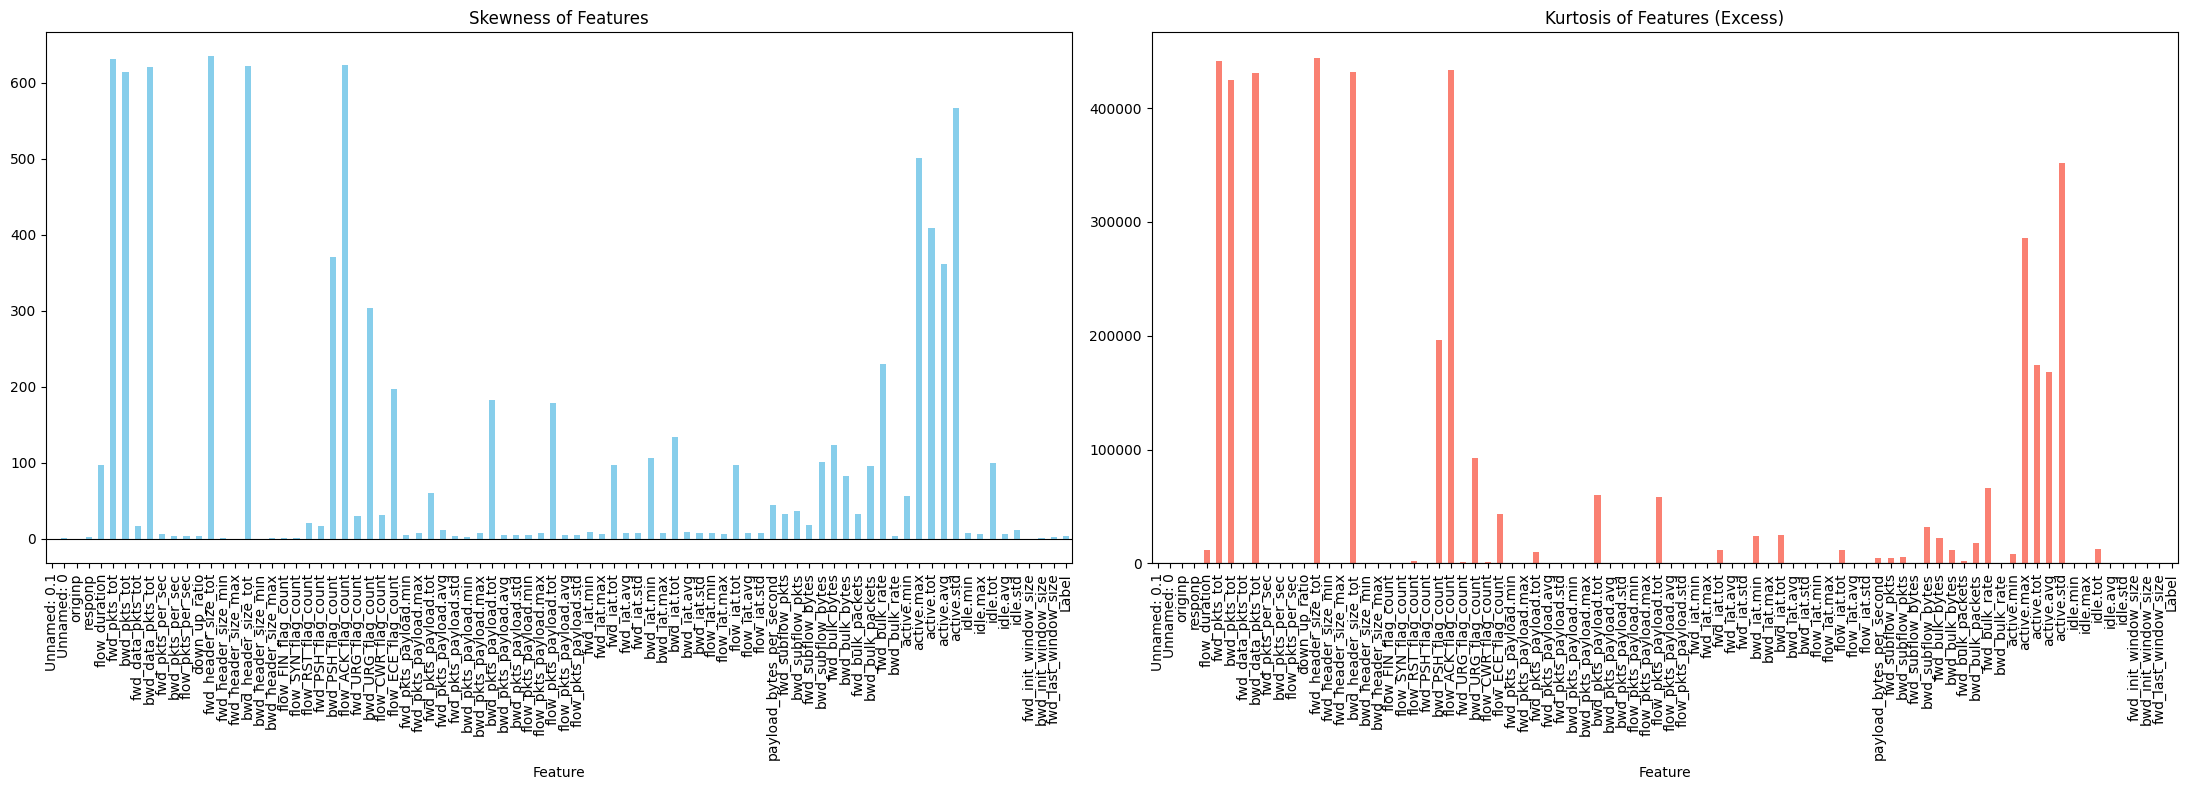

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
stats = []
for col in numeric_cols:
    stats.append({
        "Feature": col,
        "Skewness": skew(df[col].dropna()),
        "Kurtosis": kurtosis(df[col].dropna())
    })

stats_df = pd.DataFrame(stats)

fig, ax = plt.subplots(1, 2, figsize=(22, 8))

stats_df.set_index("Feature")["Skewness"].plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Skewness of Features")
ax[0].axhline(0, color="black", linewidth=0.8)

stats_df.set_index("Feature")["Kurtosis"].plot(kind="bar", ax=ax[1], color="salmon")
ax[1].set_title("Kurtosis of Features (Excess)")
ax[1].axhline(0, color="black", linewidth=0.8)

plt.tight_layout()
plt.show()


In [ ]:
le = LabelEncoder()
df["traffic_encoded"] = le.fit_transform(df["traffic_category"])
y = df["traffic_encoded"]
X = df.drop(columns=["Label", "traffic_category"], errors='ignore')

In [ ]:
selected_features = [
    "flow_FIN_flag_count",
    "flow_SYN_flag_count",
    "fwd_header_size_max",
    "bwd_header_size_max",
    "fwd_pkts_payload.std",
    "bwd_pkts_payload.std",
    "flow_pkts_payload.avg",
    "fwd_iat.max",
    "bwd_iat.max",
    "flow_iat.max",
    "fwd_init_window_size",
    "bwd_init_window_size",
    "fwd_pkts_per_sec",
    "bwd_pkts_per_sec",
    "payload_bytes_per_second",
    "active.avg",
    "idle.avg",
    "fwd_iat.std",
    "bwd_iat.std",
    "down_up_ratio"
]


In [ ]:
print(y.unique())

[3 2 0 1 4 5]


In [ ]:
from imblearn.over_sampling import SMOTE


over = SMOTE(sampling_strategy={
    2: 80000 ,3: 80000, 4: 80000, 5: 80000
}, random_state=42)

under = RandomUnderSampler(sampling_strategy={
    0: 80000, 1: 80000
}, random_state=42)

pipeline = Pipeline(steps=[('o', over), ('u', under)])
X_resampled, y_resampled = pipeline.fit_resample(X[selected_features], y)

/tmp/ipython-input-4017401086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(before_counts.keys()), y=list(before_counts.values()), ax=axes[0], palette="Set2")
/tmp/ipython-input-4017401086.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(after_counts.keys()), y=list(after_counts.values()), ax=axes[1], palette="Set2")


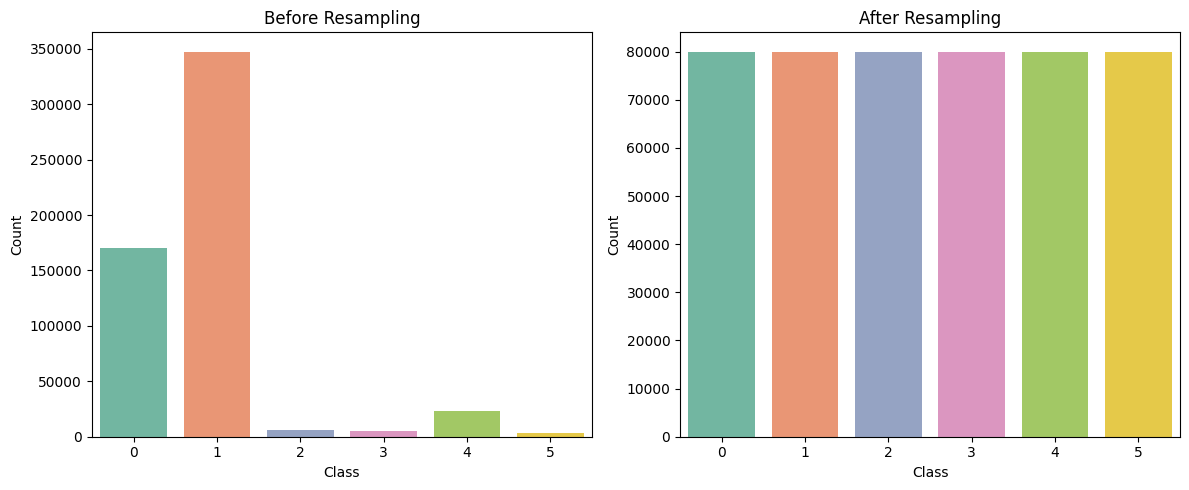

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

before_counts = Counter(y)

after_counts = Counter(y_resampled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=list(before_counts.keys()), y=list(before_counts.values()), ax=axes[0], palette="Set2")
axes[0].set_title("Before Resampling")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")


sns.barplot(x=list(after_counts.keys()), y=list(after_counts.values()), ax=axes[1], palette="Set2")
axes[1].set_title("After Resampling")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=selected_features)
df_resampled['target'] = y_resampled

print("\nHead of resampled data:\n", df_resampled.head())
print("\nTail of resampled data:\n", df_resampled.tail())


Head of resampled data:
         flow_FIN_flag_count  flow_SYN_flag_count  fwd_header_size_max  \
104945                    0                    1                   40   
141415                    0                    1                   20   
161295                    2                    2                   44   
111764                    0                    0                    8   
118268                    2                    2                   44   

        bwd_header_size_max  fwd_pkts_payload.std  bwd_pkts_payload.std  \
104945                   20              0.000000              0.000000   
141415                   20              0.000000              0.000000   
161295                   40            288.503416            401.176100   
111764                    8              0.000000             12.020815   
118268                   44             86.576706           1124.922133   

        flow_pkts_payload.avg   fwd_iat.max   bwd_iat.max  flow_iat.max  ...  \
1049

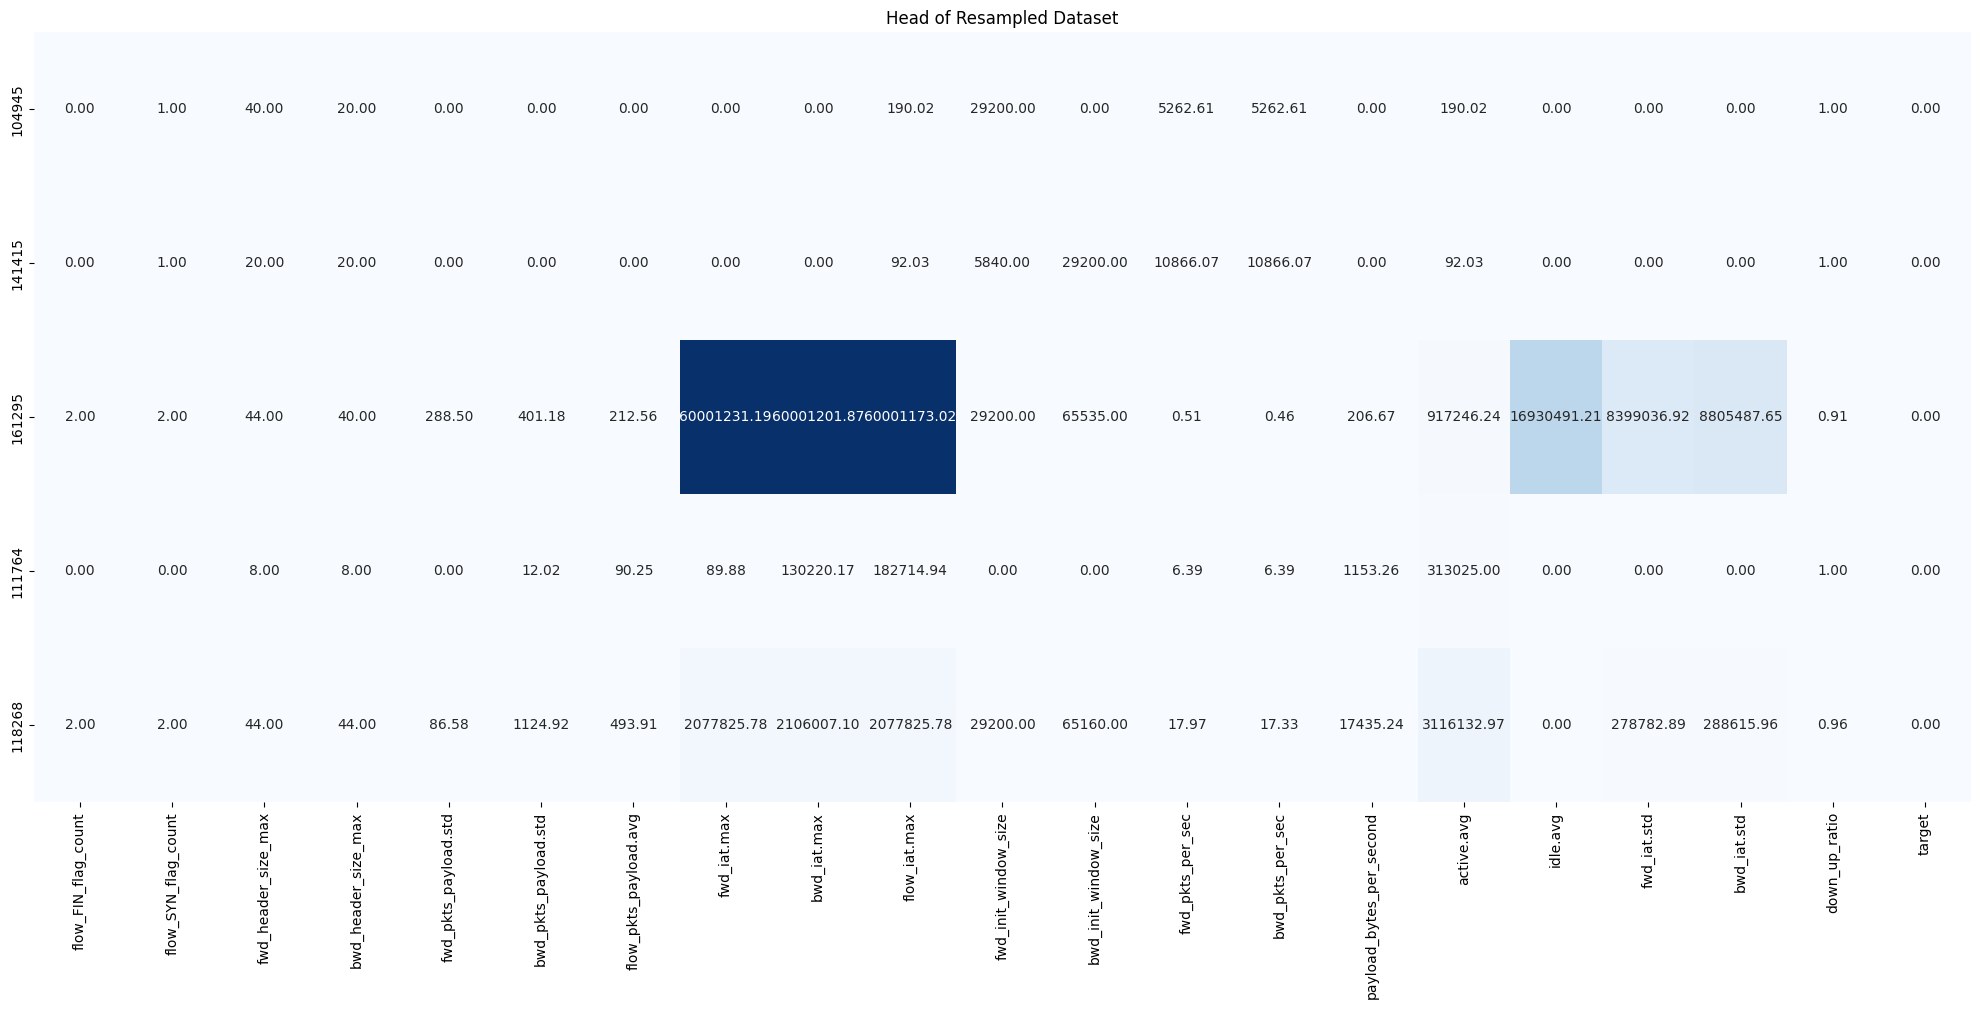

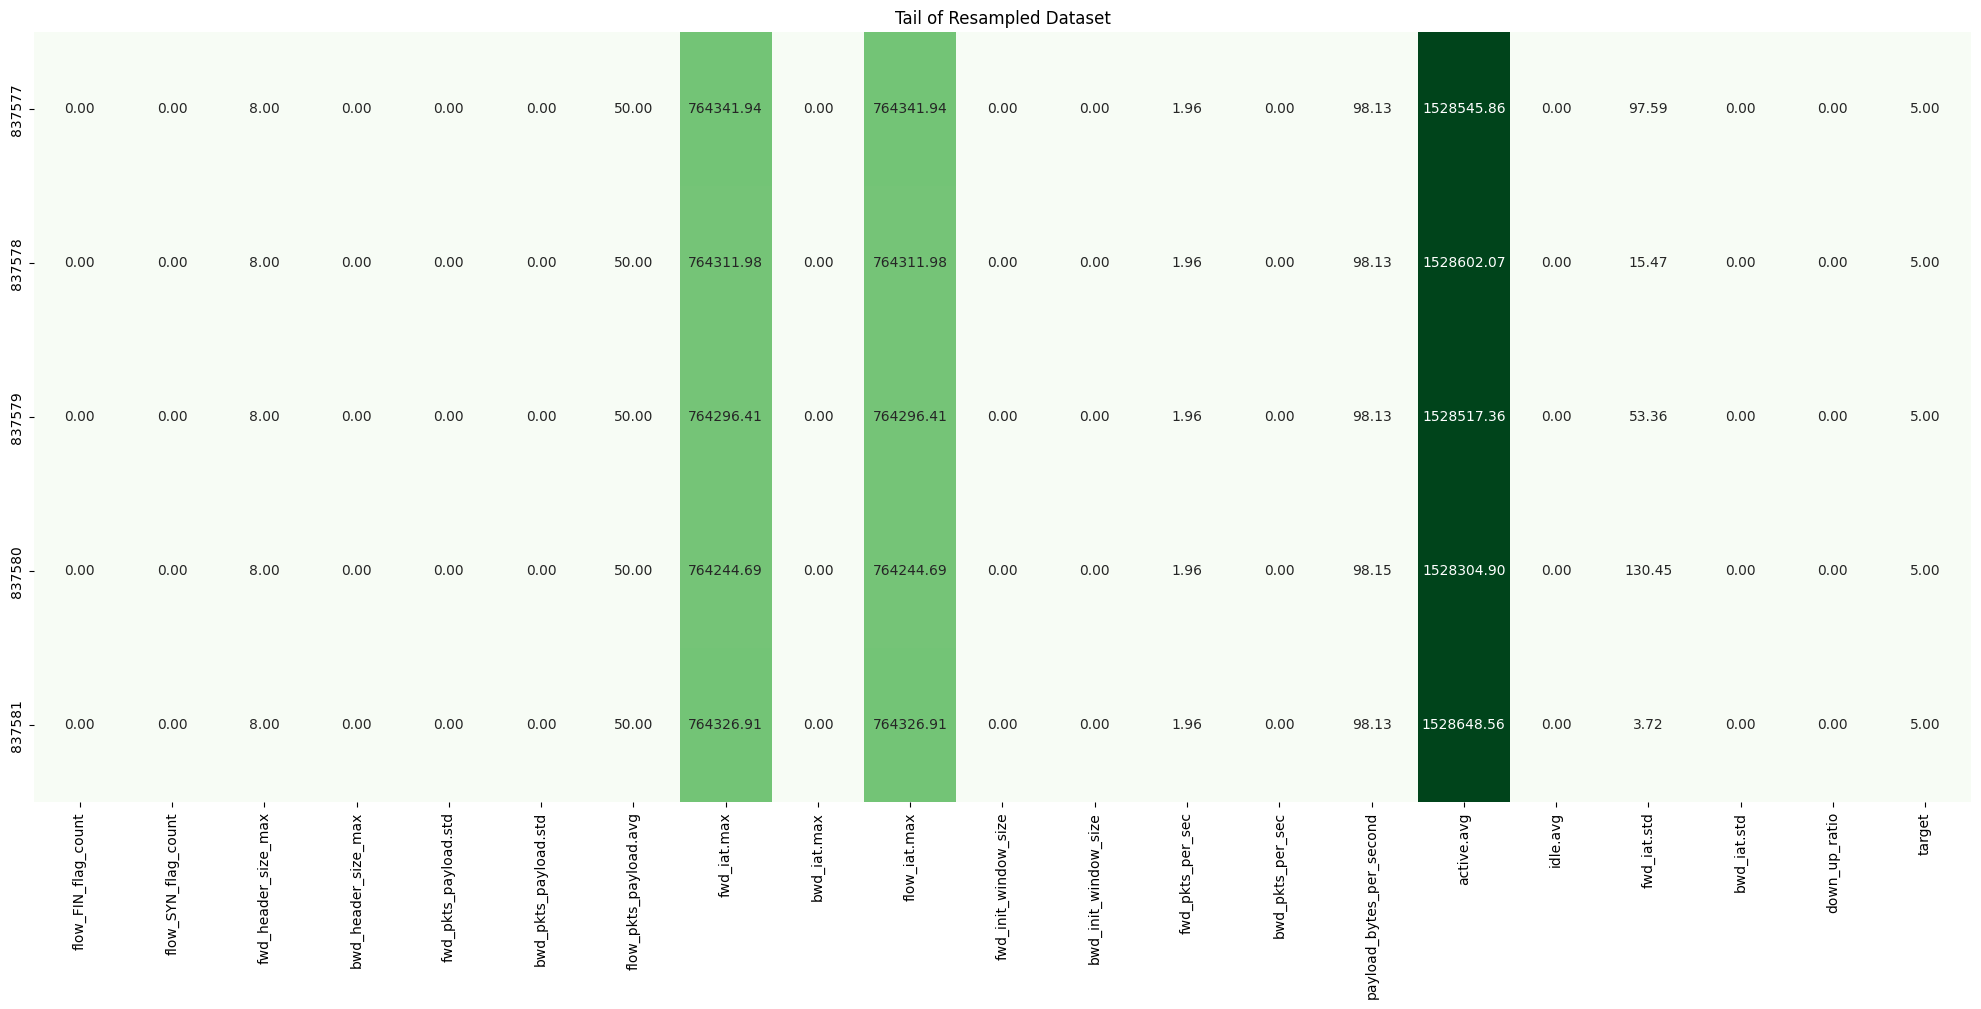

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=selected_features)
df_resampled['target'] = y_resampled

df_head = df_resampled.head(5)
df_tail = df_resampled.tail(5)

plt.figure(figsize=(25,10))
sns.heatmap(df_head, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Head of Resampled Dataset")
plt.show()

plt.figure(figsize=(25, 10))
sns.heatmap(df_tail, annot=True, fmt=".2f", cmap="Greens", cbar=False)
plt.title("Tail of Resampled Dataset")
plt.show()

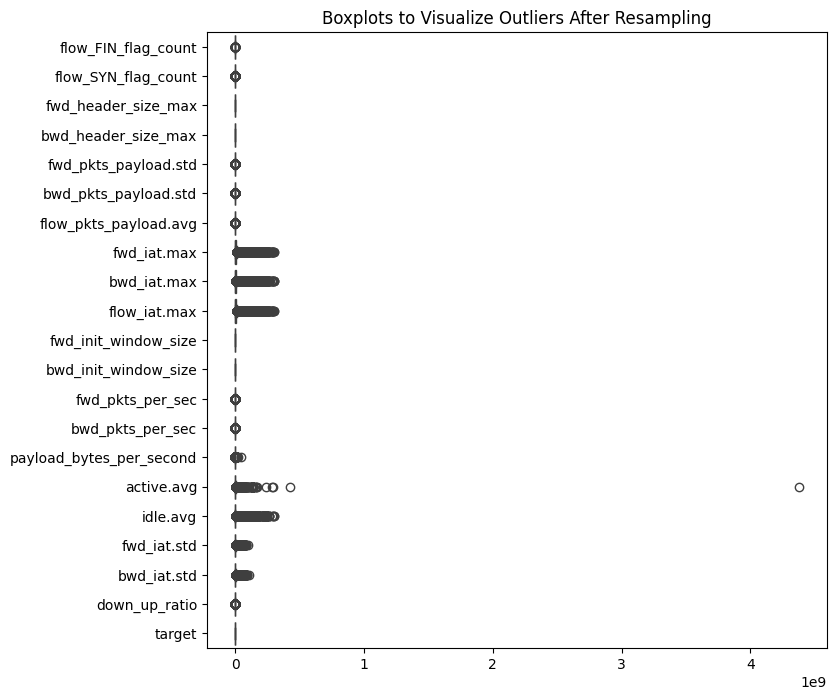

In [ ]:

df_resampled = pd.DataFrame(X_resampled, columns=selected_features)
df_resampled['target'] = y_resampled

plt.figure(figsize=(8, 8))
sns.boxplot(data=df_resampled.select_dtypes(include=['float64', 'int64']), orient="h")
plt.title("Boxplots to Visualize Outliers After Resampling")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=8,
    class_weight='balanced',
    random_state=42,
    oob_score=True,
    warm_start=True
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81     16000
           1       0.81      0.56      0.66     16000
           2       0.97      1.00      0.98     16000
           3       0.99      1.00      0.99     16000
           4       0.85      1.00      0.92     16000
           5       0.98      1.00      0.99     16000

    accuracy                           0.90     96000
   macro avg       0.90      0.90      0.89     96000
weighted avg       0.90      0.90      0.89     96000


Confusion Matrix:
[[13532  2018   168     2     0   280]
 [ 3705  8884   320   214  2850    27]
 [   10     0 15990     0     0     0]
 [    4     1     2 15993     0     0]
 [    3     3     0     0 15994     0]
 [    0     0     0     0     0 16000]]


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use comp

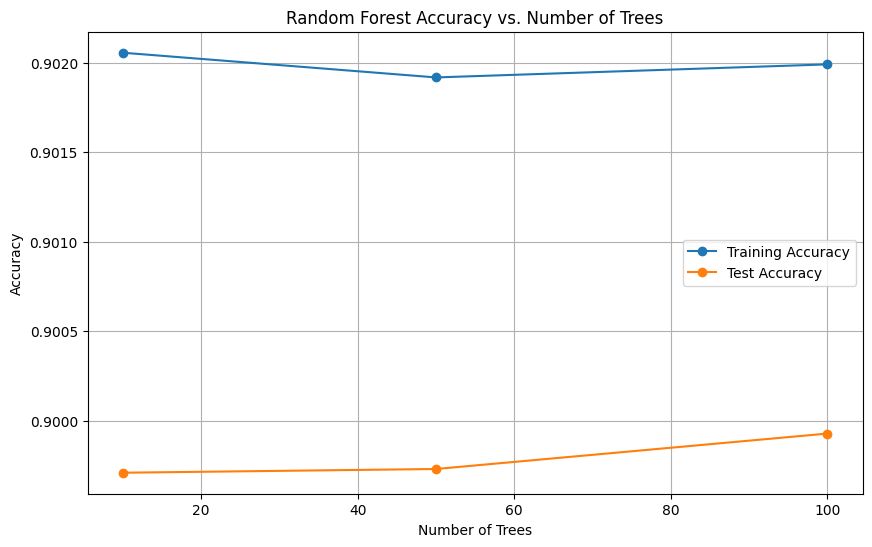

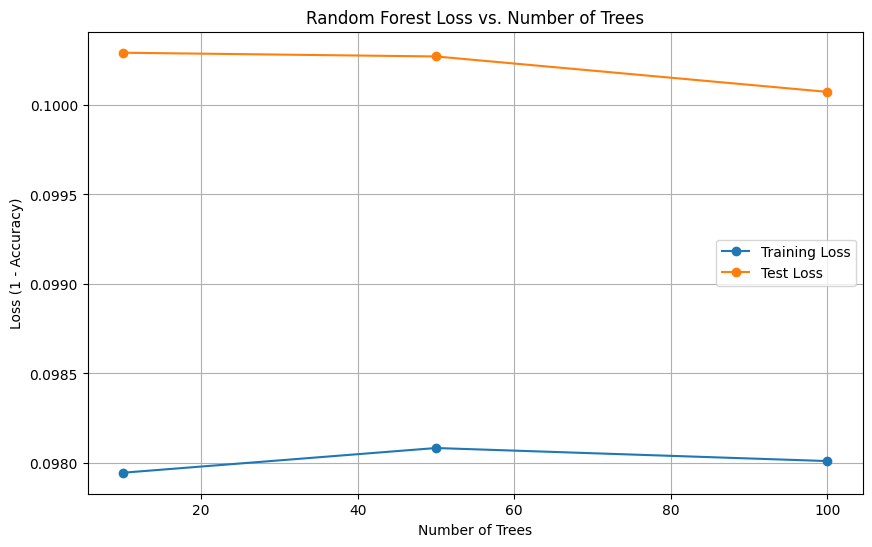

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []


n_estimators_list = [10, 50, 100]

rf = RandomForestClassifier(
    n_estimators=1,
    max_depth=10,
    min_samples_split=8,
    class_weight='balanced',
    random_state=42,
    oob_score=True,
    warm_start=True
)

for n in n_estimators_list:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores, 'o-', label="Training Accuracy")
plt.plot(n_estimators_list, test_scores, 'o-', label="Test Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, [1-s for s in train_scores], 'o-', label="Training Loss")
plt.plot(n_estimators_list, [1-s for s in test_scores], 'o-', label="Test Loss")
plt.xlabel("Number of Trees")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("Random Forest Loss vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.show()

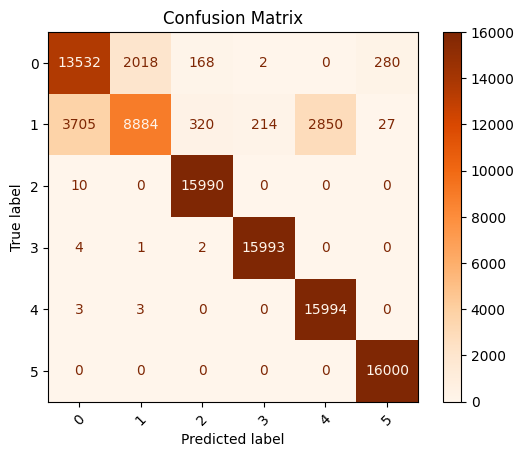

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Oranges", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
importances = rf.feature_importances_
feature_names = selected_features
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

top_features = feature_importance_df['Feature'][:10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


                     Feature  Importance
6      flow_pkts_payload.avg    0.117566
4       fwd_pkts_payload.std    0.105597
5       bwd_pkts_payload.std    0.093916
7                fwd_iat.max    0.086714
9               flow_iat.max    0.083091
19             down_up_ratio    0.079018
8                bwd_iat.max    0.073071
15                active.avg    0.056757
17               fwd_iat.std    0.053140
11      bwd_init_window_size    0.044062
3        bwd_header_size_max    0.043376
14  payload_bytes_per_second    0.035904
13          bwd_pkts_per_sec    0.033910
18               bwd_iat.std    0.032300
12          fwd_pkts_per_sec    0.022847
0        flow_FIN_flag_count    0.014964
2        fwd_header_size_max    0.010878
10      fwd_init_window_size    0.007242
16                  idle.avg    0.004151
1        flow_SYN_flag_count    0.001495


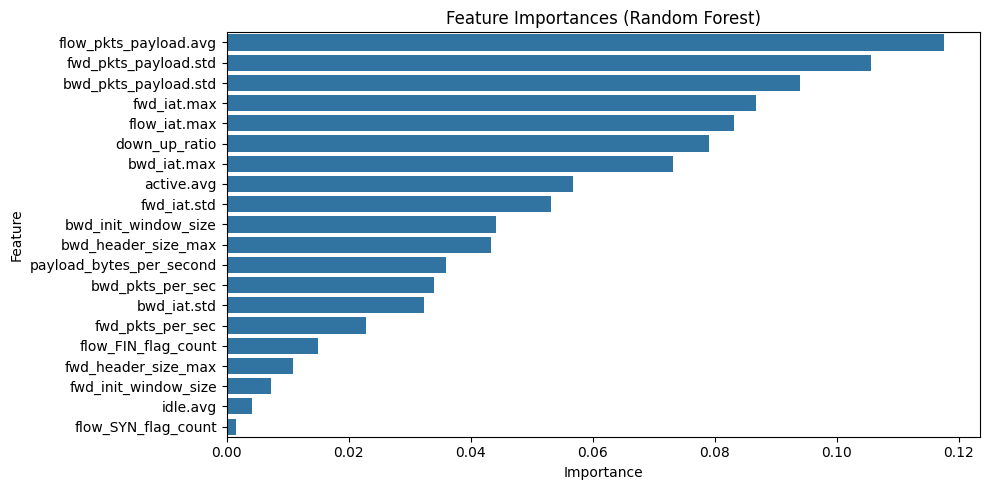

In [ ]:
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

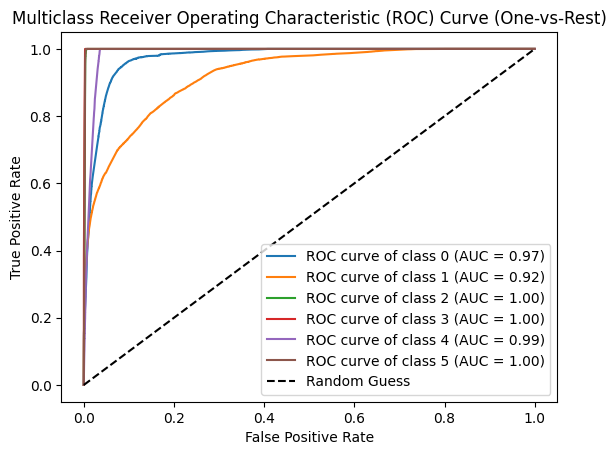

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np


classes = np.unique(y_test)
n_classes = len(classes)

y_test_binarized = label_binarize(y_test, classes=classes)

y_probs_all = rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib
joblib.dump(rf, "/content/drive/MyDrive/rf_model.pkl")

['/content/drive/MyDrive/rf_model.pkl']